In [3]:
import pandas as pd
import numpy as np

# Importing the Avocado dataset from csv file
df_avocado=pd.read_csv('Avocado.csv')
df_avocado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [ ]:
# Loading the top few data from our dataset

df_avocado.head()

We will check for the presence of Null value in our dataset

In [ ]:
df_avocado.isnull().sum()

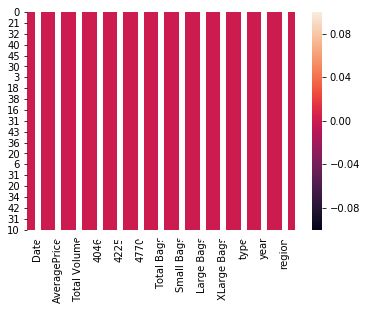

In [17]:
# Graphically we will check for the null values in our dataset using heat map

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_avocado.isnull(),annot=True)
plt.show()

Above observation shows that no null value is present in the given dataset

In [18]:
# Now we will check for the skewness in given dataset

df_avocado1 = df_avocado.drop(['Date','type','year','region'],axis=1,errors='ignore')
df_avocado1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00
...,...,...,...,...,...,...,...,...,...
10,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28
11,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00
12,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00
13,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00


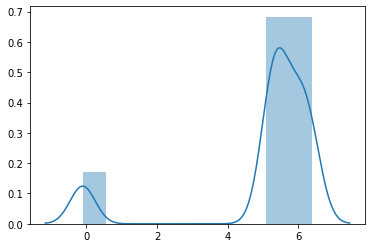

In [19]:
#Graphical representation of skewness in given dataset
sns.distplot(df_avocado1.skew())

The above observation shows our dataset is heavily skwed. We will try to normalise the data to some extend.

In [20]:
# Using log tansformation
for col in df_avocado1.columns:
    if df_avocado1.skew().loc[col]>0.55:
        df_avocado1[col]=np.log1p(df_avocado1[col])

df_avocado1.skew()

AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
dtype: float64

In [172]:
#Applying Squareroot Transform to remove the skewness from dataset
df_sqrt=np.sqrt(df_avocado1)
df_sqrt.skew()

AveragePrice   -0.460428
Total Volume    0.544746
4046           -0.385287
4225            0.003666
4770           -0.789308
Total Bags      0.518376
Small Bags      0.547589
Large Bags     -1.903957
XLarge Bags     0.375426
dtype: float64

The above observation shows that log tansform method is more suitable method for removing the skewness from the dataset

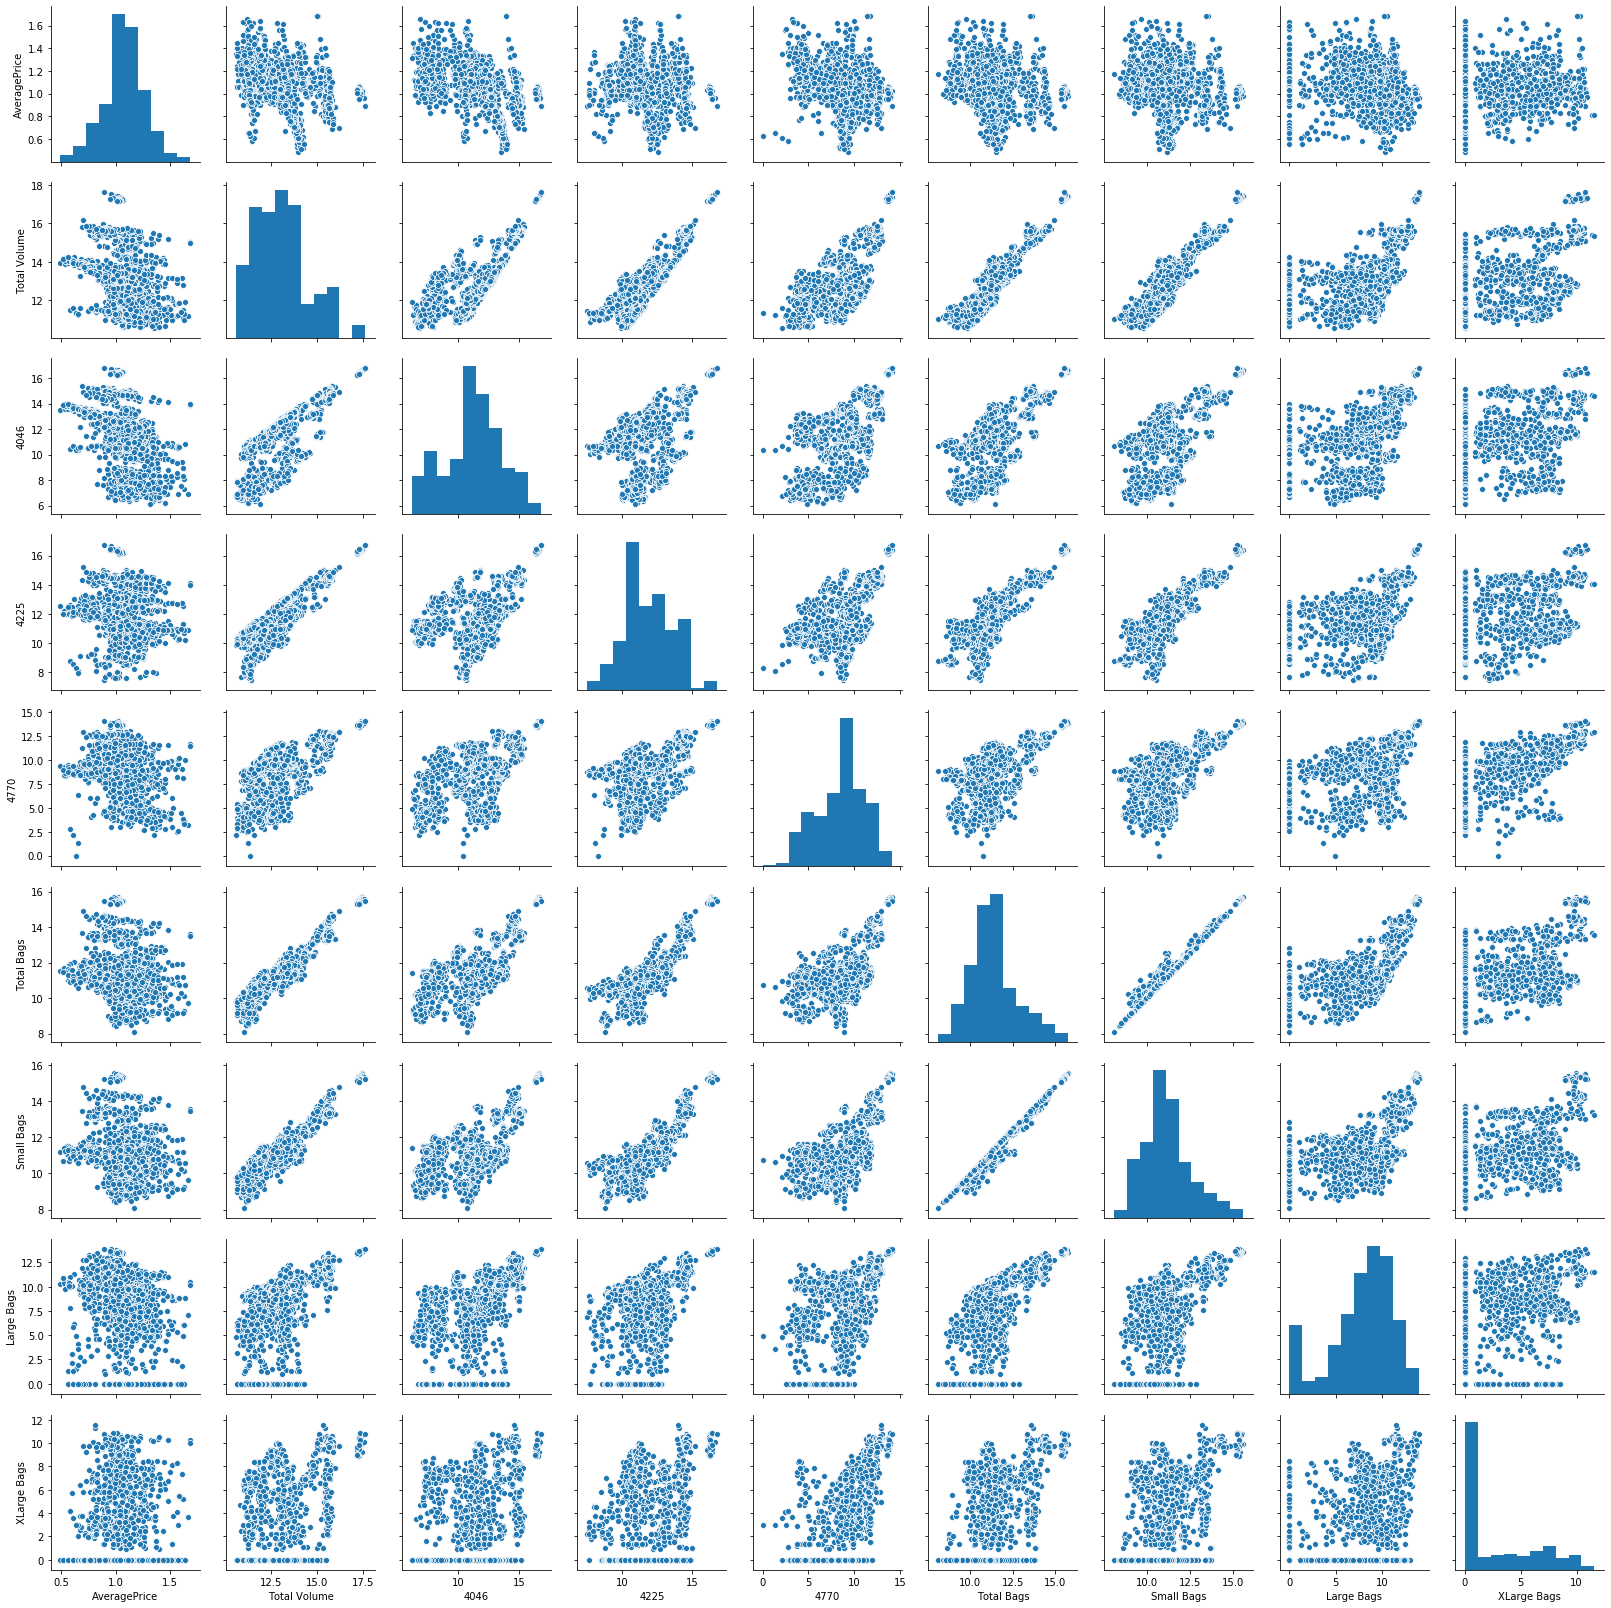

In [22]:
import seaborn as sns

sns.pairplot(df_avocado1)
plt.show()

In [23]:
# Now lets check for the outliers in our dataset

# First we will use Zscore method 
#Z-Score method

from scipy import stats
import numpy as np

z_avocado=np.abs(stats.zscore(df_avocado1))
print(z_avocado)

[[1.35048079 1.35676174 1.82816171 ... 1.53924759 0.96674301 0.81077519]
 [1.45639674 1.46638736 2.01206913 ... 1.47498255 0.95386092 0.81077519]
 [0.76783831 0.9321394  1.94183376 ... 1.58776266 0.93753117 0.81077519]
 ...
 [2.14485045 0.64565294 0.20190426 ... 0.22750693 0.34275114 1.10389091]
 [2.09189247 0.60503087 0.13577946 ... 0.19687848 0.34346272 0.81077519]
 [1.88006056 0.62805557 0.23299293 ... 0.17395651 0.44343485 0.81077519]]


In [24]:
threshold=3
print(np.where(z_avocado>3))

(array([ 760, 1182, 1182, 1182, 1183, 1183, 1183, 1184, 1184, 1184, 1185,
       1185, 1185, 1186, 1186, 1186, 1187, 1188, 1188, 1188, 1189, 1189,
       1191, 1202, 1346, 1411, 1457, 1458], dtype=int64), array([0, 1, 5, 6, 1, 5, 6, 1, 5, 6, 1, 5, 6, 1, 5, 6, 6, 1, 5, 6, 1, 5,
       5, 1, 4, 0, 0, 0], dtype=int64))


In [25]:
# Removing the Outliers from the dataset
z_avocado=z_avocado[(z_avocado<3).all(axis=1)]

print(df_avocado1.shape)
print(z_avocado.shape)

(1517, 9)
(1502, 9)


In [26]:
#Applying IQR method

Q1=df_avocado1.quantile(0.25)
Q3=df_avocado1.quantile(0.75)
IQR=Q3-Q1
print(IQR)

AveragePrice    0.210000
Total Volume    1.895935
4046            2.918181
4225            2.459320
4770            3.464924
Total Bags      1.470851
Small Bags      1.592881
Large Bags      3.989487
XLarge Bags     5.997645
dtype: float64


In [28]:
print(df_avocado1 < (Q1-1.5*IQR)) | (df_avocado1 > (Q3+1.5*IQR))

    AveragePrice  Total Volume   4046   4225   4770  Total Bags  Small Bags  \
0          False         False  False  False  False       False       False   
1          False         False  False  False  False       False       False   
2          False         False  False  False  False       False       False   
3          False         False  False  False  False       False       False   
4          False         False  False  False  False       False       False   
..           ...           ...    ...    ...    ...         ...         ...   
10         False         False  False  False  False       False       False   
11         False         False  False  False  False       False       False   
12         False         False  False  False  False       False       False   
13         False         False  False  False  False       False       False   
14         False         False  False  False  False       False       False   

    Large Bags  XLarge Bags  
0        False       

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [29]:
df_avocado_out=df_avocado1[~((df_avocado1<(Q1-1.5*IQR)) | (df_avocado1>(Q3+1.5*IQR)))]
print(df_avocado1.shape)
print(df_avocado_out.shape)

(1517, 9)
(1517, 9)


From the above observation, we can conclude that the ZScore method is best suited for removing the outliers from our given dataset

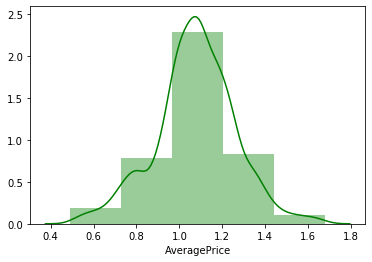

In [30]:
# We will do the Data Visualisation by using matplotlib and seaborn liberary

sns.distplot(df_avocado['AveragePrice'].dropna(),kde=True,color='green',bins=5)

The above observation shows the average price for avocado throughout the year was around 0.9 to 1.3 

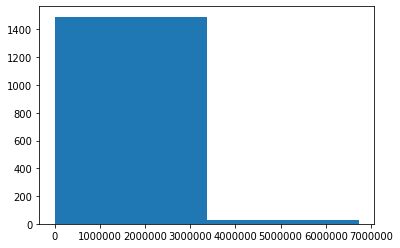

In [45]:
# Useing 
plt.hist(x="Total Bags",bins=2,data=df_avocado)
plt.show()

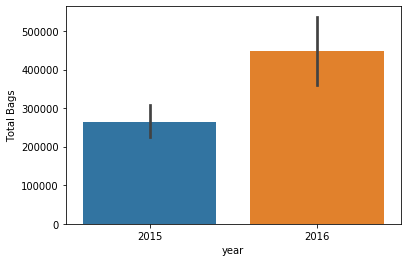

In [47]:
# Ploting the bar graph between Total Bags sold in given years.
sns.barplot(x="year",y="Total Bags",data=df_avocado)
plt.show()

The above observation shows the increase in Total sales of the bags.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026E19A8CC48>,
      dtype=object)

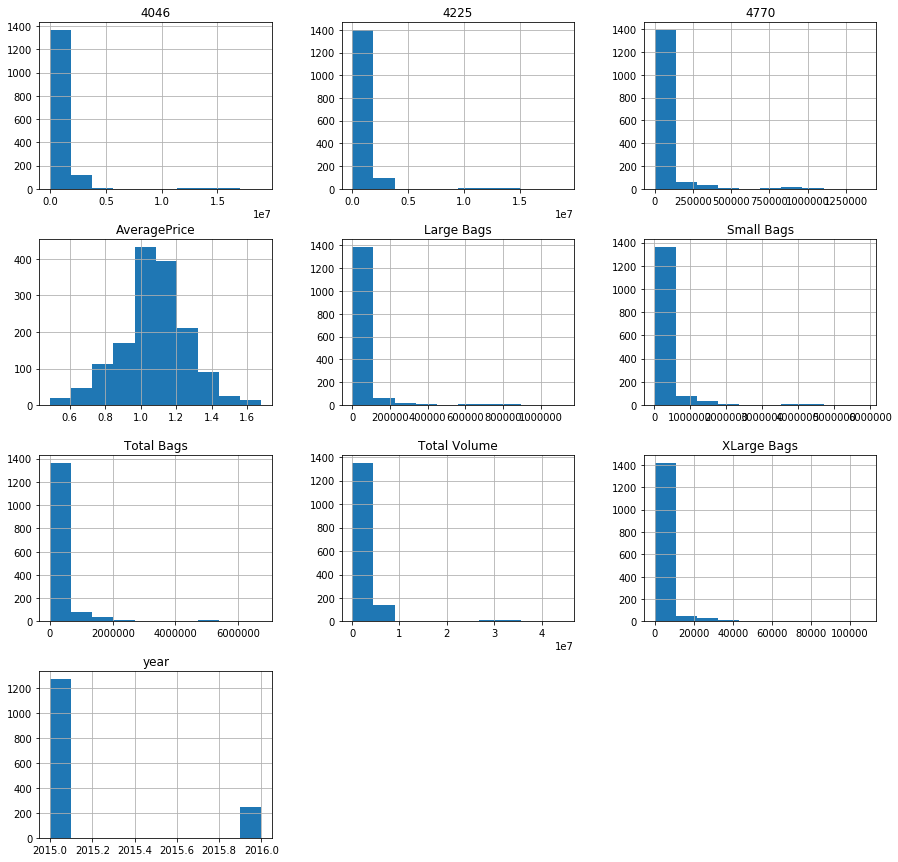

In [50]:
df_avocado.hist(figsize=(15,15))

Splitting the cleaned dataset into independent and dependent variables

In [134]:
X=df_avocado1.iloc[:,1:]
print(x)
Y=df_avocado1.iloc[:,0]
print(y)

[[ 1.35048079 -0.34696593 -0.33149016 ... -0.37105465 -0.36004386
  -0.29272731]
 [ 1.45639674 -0.34907791 -0.33167633 ... -0.3698118  -0.36000798
  -0.29272731]
 [-0.76783831 -0.33478463 -0.33161448 ... -0.37192201 -0.35996017
  -0.29272731]
 ...
 [ 2.14485045 -0.32120275 -0.30820887 ... -0.30194984 -0.29095317
  -0.1820374 ]
 [ 2.09189247 -0.31878364 -0.30423037 ... -0.29836419 -0.29078309
  -0.29272731]
 [ 1.88006056 -0.3201721  -0.30987728 ... -0.29557902 -0.26226571
  -0.29272731]]
0        Albany
1        Albany
2        Albany
3        Albany
4        Albany
        ...    
10    Charlotte
11    Charlotte
12    Charlotte
13    Charlotte
14    Charlotte
Name: region, Length: 1517, dtype: object


In [136]:
# We can scale the input variables before training the model

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(X)
x=pd.DataFrame(x,columns=X.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-1.356762,-1.828162,-0.567524,-1.810613,-1.684725,-1.539248,-0.966743,-0.810775
1,-1.466387,-2.012069,-0.684233,-1.737594,-1.620123,-1.474983,-0.953861,-0.810775
2,-0.932139,-1.941834,-0.159241,-1.428526,-1.732326,-1.587763,-0.937531,-0.810775
3,-1.212820,-1.790572,-0.403726,-1.654003,-1.977653,-1.838106,-0.862073,-0.810775
4,-1.516851,-1.869374,-0.694856,-1.637471,-1.932480,-1.800022,-0.748414,-0.810775
...,...,...,...,...,...,...,...,...
1512,-0.598749,-0.109561,-0.547264,0.471494,-0.288452,-0.291023,0.408973,0.753079
1513,-0.646336,-0.230919,-0.592472,0.511204,-0.242463,-0.209250,0.354507,-0.810775
1514,-0.645653,-0.201904,-0.584607,0.453477,-0.252693,-0.227507,0.342751,1.103891
1515,-0.605031,-0.135779,-0.576885,0.470688,-0.235255,-0.196878,0.343463,-0.810775


Now we will chcek for the random state value for the best accuracy in our prediction.

In [138]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
max_r_score=0
for r_state in range(0,300):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(X_train,Y_train)
    Y_pred=regr.predict(X_test)
    r2_scr=r2_score(Y_test,Y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
        print("max r2 score at",final_r_state,"is",max_r_score)

max r2 score at 0 is 0.3431622155197852
max r2 score at 1 is 0.413956087218881
max r2 score at 2 is 0.4241533947627357
max r2 score at 25 is 0.43566702875162344
max r2 score at 30 is 0.46714140478691746
max r2 score at 89 is 0.4733944420095746
max r2 score at 151 is 0.4931103748342691


In [141]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=151,test_size=0.20)
regr=linear_model.LinearRegression()
regr.fit(X_train,Y_train)
Y_pred=regr.predict(X_test)

In [142]:
# Now we will chcek the RMSE and r2 score for the accuracy
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

RMSE=np.sqrt(mean_squared_error(Y_test,Y_pred))
r2_score=r2_score(Y_test,Y_pred)

print(RMSE)
print(r2_score)

0.13645240917885204
0.4931103748342691


The above observation shows the poor accuracy rate for the Regression model.
Hence, We will chcek for the Classification model for the same Train_Test Dataset

Classification

In [143]:
df_avocado2 = df_avocado.drop(['Date','type','year'],axis=1,errors='ignore')
df_avocado2

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,Albany
...,...,...,...,...,...,...,...,...,...,...
10,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,Charlotte
11,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,Charlotte
12,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,Charlotte
13,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,Charlotte


In [144]:
x=df_avocado2.iloc[:,:-1]
print(x)
y=df_avocado2.iloc[:,-1]
print(y)

    AveragePrice  Total Volume      4046       4225      4770  Total Bags  \
0           1.33      64236.62   1036.74   54454.85     48.16     8696.87   
1           1.35      54876.98    674.28   44638.81     58.33     9505.56   
2           0.93     118220.22    794.70  109149.67    130.50     8145.35   
3           1.08      78992.15   1132.00   71976.41     72.58     5811.16   
4           1.28      51039.60    941.48   43838.39     75.78     6183.95   
..           ...           ...       ...        ...       ...         ...   
10          1.39     190846.01  57529.11   56366.66  17531.78    59418.46   
11          1.51     178235.75  43325.87   52189.61  19419.57    63300.70   
12          1.48     178410.82  46364.75   52893.38  16736.92    62415.77   
13          1.47     189131.52  54110.79   53593.58  17495.42    63931.73   
14          1.43     182978.30  43116.41   54193.42  16563.91    69104.56   

    Small Bags  Large Bags  XLarge Bags  
0      8603.62       93.25       

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

lsvc=LinearSVC(dual=False)
print(lsvc)


LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


In [146]:
lsvc.fit(x_train,y_train)
score=lsvc.score(x_train,y_train)
print(score)

0.33388293487221765


In [147]:
cv_score=cross_val_score(lsvc,x_train,y_train,cv=10)
print(cv_score.mean())

C:\Users\Rizwan Khan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.32439412452293614


The accuracy score for the given dataset with LinearSVC module is very poor.

So we will apply the LogisticRegression method to check for the same dataset.

In [149]:
from sklearn.linear_model import LogisticRegression

logtitanic=LogisticRegression()
logtitanic.fit(x_train,y_train)

pred= logtitanic.predict(x_test)

C:\Users\Rizwan Khan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rizwan Khan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [150]:
accuracy=accuracy_score(y_test,pred)
accuracy

0.32894736842105265

We will check for the accuracy score with KNN Classifier

In [168]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean',p=2,weights='uniform')
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [169]:
y_pred=knn.predict(x_test)

In [170]:
accuracy= knn.score(x_test,y_test)
accuracy

0.805921052631579

# The best Accuracy Score for the KNNmodule is 80.59% with k_neighbor value equal to 5.
We can conclude from our observation that KNNCalssifier module is the best suited one for the given dataset.

Hence, The region/city  selection for the sales of HASS AVOCADO is totally dependent on the features like - Total Volume of avocado sales, Average Total Sales, Total Number of bags sale with different size range.The sale of HASS AVOCADO increased from 2015 to 2016 with good increase in average cost of avocado.


In [171]:
from sklearn.externals import joblib

joblib.dump(accuracy,'avocado.pkl')

C:\Users\Rizwan Khan\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['avocado.pkl']